# Real Estate Valuation - Taiwan

The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. 

## Goal of this notebook: 
The goal of this notebook is to predict the house price of unit area in Tawain (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared).

## Source of dataset 
UCI Machine Learning Repository [click here.](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

## Attribute Information:
The inputs are as follows:

- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.) 
- X2=the house age (unit: year) 
- X3=the distance to the nearest MRT station (unit: meter) 
- X4=the number of convenience stores in the living circle on foot (integer) 
- X5=the geographic coordinate, latitude. (unit: degree) 
- X6=the geographic coordinate, longitude. (unit: degree) 

The output is as follow:
- Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared) 


[Download dataset](https://drive.google.com/file/d/1uUOmUjoOgrJAooZUUzr4kR6zqiV0cmHw/view?usp=sharing()

# 1. Import Dataset



In [1]:
#import package
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/kaggle/input/real-estate-price-prediction/Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
# checking rows and columns 
df.shape

(414, 8)

The real estate valuation dataset has 414 rows, 8 columns, and one of the columns indicates No (it does not provide significance to the model).

In [4]:
#drop column no
df = df.drop('No', axis=1)

#### Profiling Descriptive Stats

In [5]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


The house prices spread from a range of 7.6 Pyng to 117.5 Pyng with an average of 37.98 Pyng. Furthermore, the middle value or median of the house prices which is 38.45 Pyng almost shows the similarity with the average of 37.98 Pyng (Meaning the Normal Distribution Assumption is valid).

#### Simplify the colums label for a better processing

In [6]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [7]:
#Delete label comment, thus it gives simplicity 
df.rename(columns={'X1 transaction date' : 'X1', 'X2 house age':'X2',
       'X3 distance to the nearest MRT station':'X3',
       'X4 number of convenience stores':'X4', 'X5 latitude':'X5', 'X6 longitude':'X6',
       'Y house price of unit area':'Y'}, inplace=True)

In [8]:
df

,X1,X2,X3,X4,X5,X6,Y
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


# 2. EDA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

**2.1. Illustrate the condition of the house price in the (house price of unit area) variable!**

**a. The explanation can be given through descriptive statistic from house price feature.**

In [10]:
df.describe()

,X1,X2,X3,X4,X5,X6,Y
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Key takeaway:
* The Y variable or house price has met the classical assumption of a normal distribution with similarities in the mean value (mean) and median value (median), which are 37.98 and 38.45 respectively. 

**b. How about the distribution of house price? **

In [11]:
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats

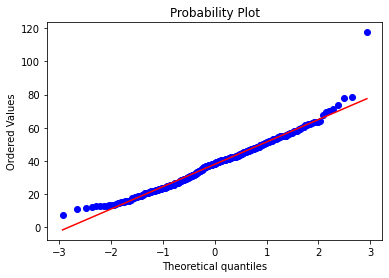

In [12]:
#QQ-Plot
stats.probplot(df['Y'], dist='norm', plot=py)
py.show()

Key takeaway:
* It can be seen from the QQ-Plot that the Y values depicted as dots show that they overlap with the diagonal line, overall. In other words, the Y value data can meet the regression assumption, which is a normal distribution.

**c. Is there any outlier value in the house price variable? If so, what are the values?**


<AxesSubplot:>

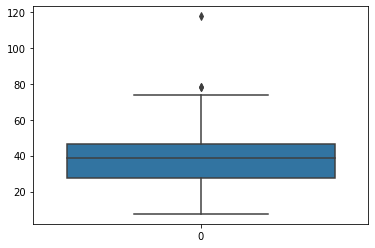

In [13]:
sns.boxplot(data=df['Y'])

<AxesSubplot:>

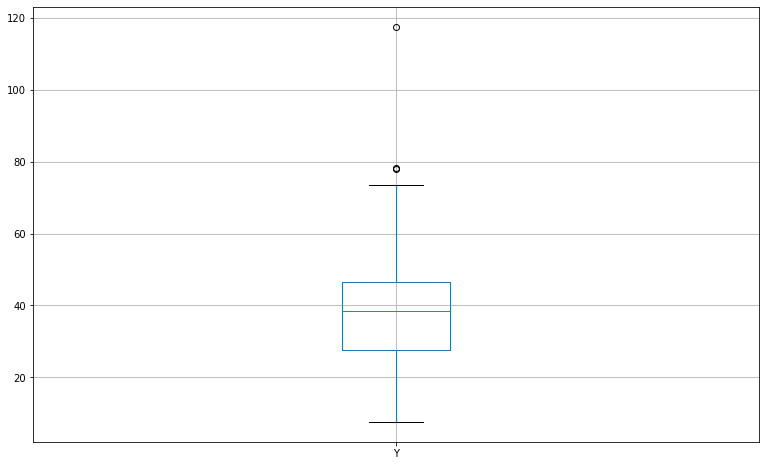

In [14]:
df[['Y']].boxplot(figsize=(13, 8))

Key takeaway:
* From the above boxplot, there are outlier data around the values of 75-80 and below 120. 

In [15]:
#Find Q1 & Q3
Q1 =df['Y'].quantile(0.25)
Q3 =df['Y'].quantile(0.75)
print(Q1)
print(Q3)

27.7
46.6


In [16]:
# Find the IQR which is the difference between third and first quartile
IQR =  Q3 - Q1
IQR

18.900000000000002

In [17]:
# Find lower and upper bound
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(lower_bound)
print(upper_bound)

-0.6500000000000021
74.95


In [18]:
# Find outliers
df[(df['Y']<lower_bound) | (df['Y']>upper_bound)]

,X1,X2,X3,X4,X5,X6,Y
220,2013.333,37.2,186.5101,9,24.97703,121.54265,78.3
270,2013.333,10.8,252.5822,1,24.97460,121.53046,117.5
312,2013.583,35.4,318.5292,9,24.97071,121.54069,78.0


Key takeaway: 
* The obtained outlier values are greater than the upper bound (78, 78.3, and 117.5).

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      414 non-null    float64
 1   X2      414 non-null    float64
 2   X3      414 non-null    float64
 3   X4      414 non-null    int64  
 4   X5      414 non-null    float64
 5   X6      414 non-null    float64
 6   Y       414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [20]:
df = df[~((df['Y'] < (Q1 - 1.5 * IQR)) |(df['Y'] > (Q3 + 1.5 * IQR)))]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 0 to 413
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      411 non-null    float64
 1   X2      411 non-null    float64
 2   X3      411 non-null    float64
 3   X4      411 non-null    int64  
 4   X5      411 non-null    float64
 5   X6      411 non-null    float64
 6   Y       411 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.7 KB


**d. What are the variables that are correlated with house price? What is the direction and how strong is the relationship?**

**Note : If the correlation coefficient is >= 0.5, it means that there is a relationship between the variables.**

**If the correlation coefficient is less than 0.5, there is no relationship between variables.**

In [22]:
df.corr()

,X1,X2,X3,X4,X5,X6,Y
X1,1.000000,0.010083,0.065700,0.002447,0.032960,-0.043740,0.067013
X2,0.010083,1.000000,0.030167,0.035385,0.052285,-0.053527,-0.242852
X3,0.065700,0.030167,1.000000,-0.604710,-0.590426,-0.806768,-0.701349
X4,0.002447,0.035385,-0.604710,1.000000,0.446079,0.448211,0.605853
X5,0.032960,0.052285,-0.590426,0.446079,1.000000,0.412657,0.571849
X6,-0.043740,-0.053527,-0.806768,0.448211,0.412657,1.000000,0.554585
Y,0.067013,-0.242852,-0.701349,0.605853,0.571849,0.554585,1.000000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'X1'),
  Text(0, 1.5, 'X2'),
  Text(0, 2.5, 'X3'),
  Text(0, 3.5, 'X4'),
  Text(0, 4.5, 'X5'),
  Text(0, 5.5, 'X6'),
  Text(0, 6.5, 'Y')])

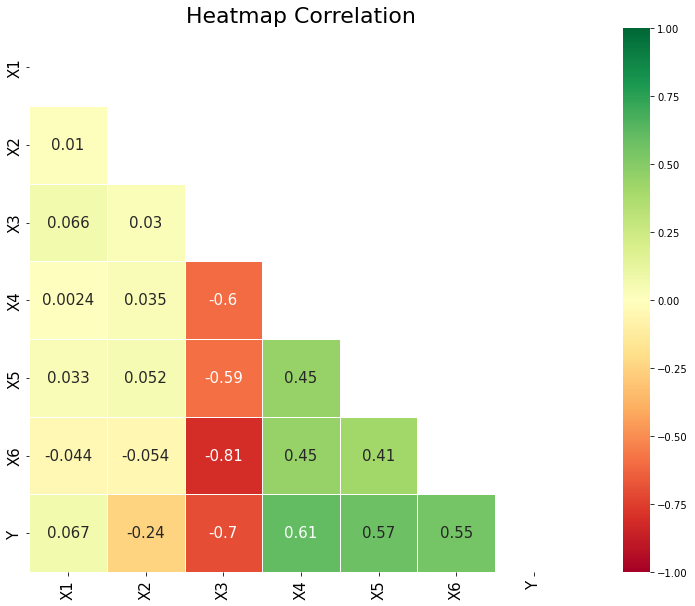

In [23]:
#Heatmap Correlation
import seaborn as sns
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
            square=True, linewidths=.5, annot_kws={"size": 15})
plt.xticks(rotation=90, fontsize=15)
plt.title('Heatmap Correlation', fontsize=22)
plt.yticks(fontsize=15)

Key takeaway: 
* From the correlation test, it can be determined that there is a relationship between variables X3, X4, X5, and X6 with variable Y.
* X3 and Y have a negative correlation coefficient (-0.67), which means the distance to the nearest MRT station is negatively related to the size of the housing unit price. The closer the housing area is to the MRT station, the higher the price of the house, and vice versa.

### X2 vs Y

In [24]:
import matplotlib.pyplot as plt

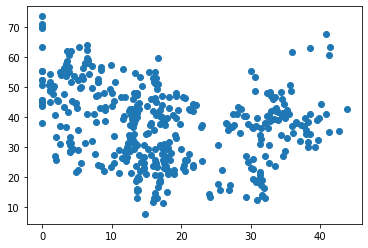

In [25]:
#House Age vs House Price Plot
plt.scatter(df['X2'],df['Y'])

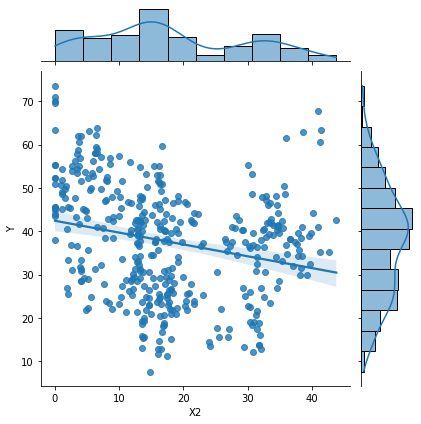

In [26]:
import seaborn as sns
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X2', y='Y', data=df, kind="reg")

Key takeaway: 
* House Age (X2) doesn't show a correlation with house price (Y) because of its small corr value.

### X3 vs Y

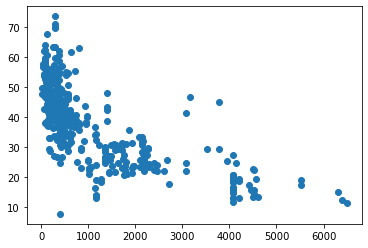

In [27]:
#distance to the nearest MRT station vs House Price Plot
plt.scatter(df['X3'],df['Y'])

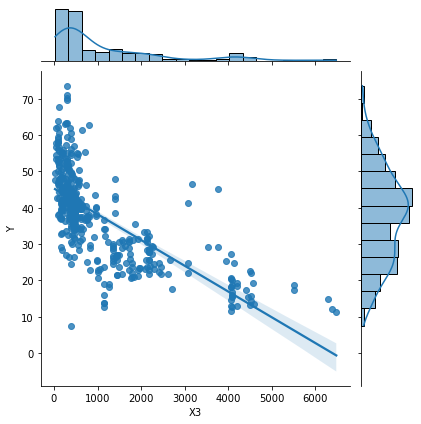

In [28]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X3', y='Y', data=df, kind="reg")

Key takeaway: 
* There is a negative relationship between the distance to the MRT (X3) around the housing area and the house price per unit (Y). In other words, the closer the distance to the MRT, the higher the house price or the further the distance to the MRT, the lower the house price.

### X4 vs Y

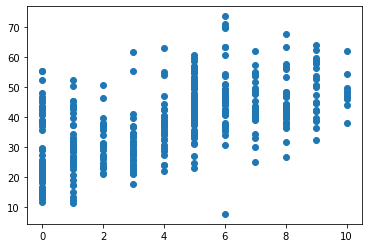

In [29]:
#number of convenience stores vs House Price
plt.scatter(df['X4'],df['Y'])

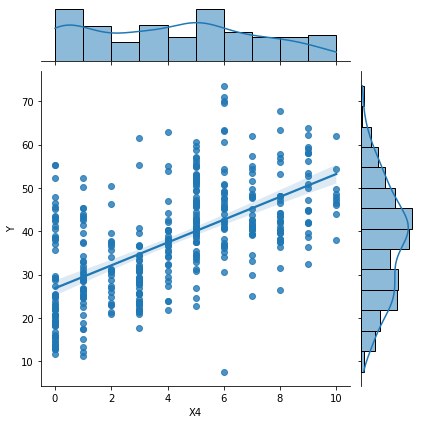

In [30]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X4', y='Y', data=df, kind="reg")

Key takeaway: 
* There is a positive relationship between the number of shopping centers (X4) around the housing area and the house price (Y). It can be said that the more shopping centers there are, the higher the house price will be, and vice versa.

### X5 vs Y

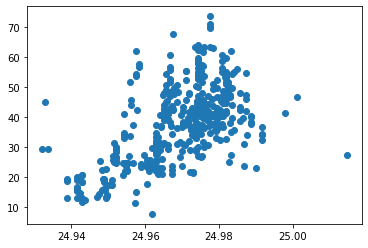

In [31]:
#Latitude vs House Price
plt.scatter(df['X5'],df['Y'])

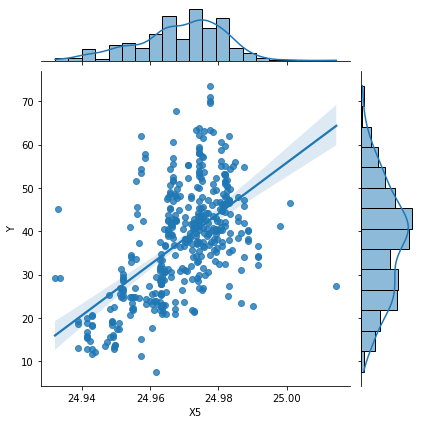

In [32]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X5', y='Y', data=df, kind="reg")

Key takeaway: 
* There is a positive relationship between latitude (geographic location) and house price.

### X6 vs Y

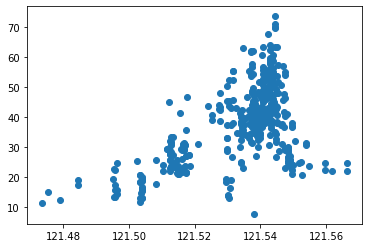

In [33]:
#Longitude vs House Price
plt.scatter(df['X6'], df['Y'])

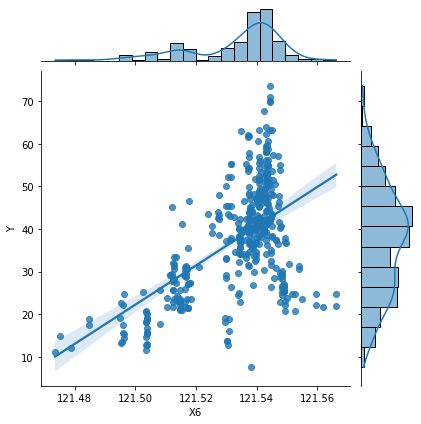

In [34]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X6', y='Y', data=df, kind="reg")

Key takeaway: 
* There is a positive or aligned relationship between longitude (map location) and house price.

Conclusion: 

There are variables that have a correlation with the House Price (Y), they are:
1. X3 (distance to MRT)
2. X4 (number of shopping centers)
3. X5 (latitude)
4. X6 (longitude)

Where X3 (distance to MRT) is the only variable with a negative correlation.

## Feature Engineering:

###  Checking Multicolinearity

In [35]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Matrix antara variable X')

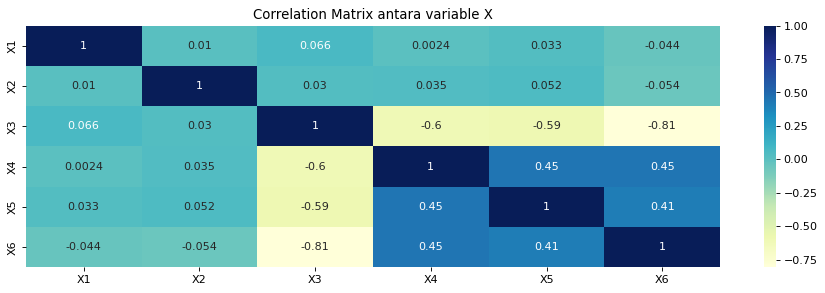

In [36]:
fig, ax = plt.subplots(figsize=(14,4), dpi=80)
sns.heatmap(df.loc[:, 'X1':'X6'].corr(), cmap="YlGnBu",annot=True)
plt.title('Correlation Matrix antara variable X')

Key takeaway:
* Between all the independent variables, multicollinearity appears between variables X3 and X6 with a value of -0.62. This means that the distance to the MRT and longitude have a high correlation.

Decision -> 

From the Heat Map Corr, it can be seen that X3 has a higher correlation (-0.67) compared to X6 (0.52). The decision that can be made is to remove the X6 variable. To see the relationship of one of the variables (whether X3 or X6) with the target variable (Y), take one of the variables and then look at the relationship between the two.

# 3. Data Preprocessing

### Check null values

In [37]:
df.isna().sum().sort_values(ascending=False)

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
Y     0
dtype: int64

Key takeaway:
* There is no null or NaN value

### Data Conversion

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 0 to 413
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      411 non-null    float64
 1   X2      411 non-null    float64
 2   X3      411 non-null    float64
 3   X4      411 non-null    int64  
 4   X5      411 non-null    float64
 5   X6      411 non-null    float64
 6   Y       411 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 41.9 KB


Key takeaway: 
* There is false data stype, X1 should be datetime.

In [39]:
df["X1"] = pd.to_datetime(df["X1"])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df.dtypes

X1    datetime64[ns]
X2           float64
X3           float64
X4             int64
X5           float64
X6           float64
Y            float64
dtype: object

In [41]:
df.X1

0     1970-01-01 00:00:00.000002012
1     1970-01-01 00:00:00.000002012
2     1970-01-01 00:00:00.000002013
3     1970-01-01 00:00:00.000002013
4     1970-01-01 00:00:00.000002012
                   ...             
409   1970-01-01 00:00:00.000002013
410   1970-01-01 00:00:00.000002012
411   1970-01-01 00:00:00.000002013
412   1970-01-01 00:00:00.000002013
413   1970-01-01 00:00:00.000002013
Name: X1, Length: 411, dtype: datetime64[ns]

### Checking duplicate values

In [42]:
# Check duplicate values
df[df.duplicated(keep=False)]

,X1,X2,X3,X4,X5,X6,Y


Key takeaway: 
* There is no row that shows False value or duplicate values.

### Feature Engineering

In [43]:
df.X1.unique()

array(['1970-01-01T00:00:00.000002012', '1970-01-01T00:00:00.000002013'],
      dtype='datetime64[ns]')

In [44]:
#df['Year'] = pd.to_datetime(df['X1'], errors='coerce', utc=True).dt.strftime('%Y')

# 4. Model Prediction

In [45]:
X = df.loc[:, 'X3':'X5']

In [46]:
y = pd.DataFrame(df['Y'])

In [47]:
#membagai dataset menjadi data training dan data testing dengan proporsi 80:20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [48]:
X

,X3,X4,X5
0,84.87882,10,24.98298
1,306.59470,9,24.98034
2,561.98450,5,24.98746
3,561.98450,5,24.98746
4,390.56840,5,24.97937
...,...,...,...
409,4082.01500,0,24.94155
410,90.45606,9,24.97433
411,390.96960,7,24.97923
412,104.81010,5,24.96674


In [49]:
y

,Y
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


### Feature Scaling

FS is used because I want to find which predictor variables that have equal kontribution (Standardization)

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [51]:
np.set_printoptions(suppress=True) 
print(X_train[:10])

[[ 0.02626102 -0.02282438  1.81468406]
 [ 1.54898949 -1.38398722 -1.17834838]
 [ 2.32527848 -1.38398722 -2.11508055]
 [-0.74039706 -1.04369651  0.35924552]
 [-0.48686441  0.31746633 -0.32860424]
 [-0.21504679 -1.38398722 -0.47438973]
 [-0.23219168 -0.02282438  0.77566042]
 [-0.65448945  0.99804775  0.48731122]
 [-0.78762975  2.01891988  1.01407205]
 [ 1.06887607 -0.02282438 -0.65642023]]


In [52]:
X_train.shape

(328, 3)

In [53]:
y_train.shape

(328, 1)

In [54]:
print(y_train[:10])

        Y
296  34.1
307  24.7
41   18.2
306  50.2
139  42.5
239  29.7
159  37.4
23   47.9
363  48.0
13   23.8


## Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [56]:
ypred=model.predict(X_test)

In [57]:
#mengubah menjadi vertikal matrix nya
ypred = ypred.reshape(-1,1)

In [58]:
# evaluate model
display(model.score(X_test, y_test))

0.6191822804548149

In [59]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#### MSE

In [60]:
print('MSE : ', mean_squared_error(y_test,ypred).round(2))
print('MAE : ', mean_absolute_error(y_test,ypred).round(2))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)).round(2))

MSE :  65.88
MAE :  6.3
RMSE :  8.12


#### R-Square

In [61]:
r2_lr = r2_score(y_test,ypred).round(2)
r2_lr

0.62

Key Takeway:

This regression model is only able to explain 55% of its data variability, with the remaining 45% being explained by other variables in predicting housing prices. The regression model is considered good if R2 is greater than 75%.

## Random Forest Regression

In [62]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

model2 = RandomForestRegressor(max_depth=2, random_state=0)
model2.fit(X_train, y_train)

# evaluate model
display(model2.score(X_test, y_test))

# use model to predict
ypred = model2.predict(X_test)

ypred = ypred.reshape(-1,1)

print('MSE : ', mean_squared_error(y_test,ypred))
print('MAE : ', mean_absolute_error(y_test,ypred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.7156824813272102

MSE :  49.183941042331575
MAE :  5.309229580582352
RMSE :  7.0131263386831675


## Support Vector Regression (SVR)

In [63]:
from sklearn.svm import SVR
model3 = SVR(kernel = 'rbf')
model3.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [64]:
# evaluate model
display(model3.score(X_test, y_test))

# use model to predict
ypred = model3.predict(X_test)

ypred = ypred.reshape(-1,1)

print('MSE : ', mean_squared_error(y_test,ypred))
print('MAE : ', mean_absolute_error(y_test,ypred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)))

0.6339392861178776

MSE :  63.32465425815911
MAE :  5.9900984794024295
RMSE :  7.9576789491760165


## Decission Tree Regressor

In [65]:
from sklearn.tree import DecisionTreeRegressor
model4 = DecisionTreeRegressor(random_state=1)
model4.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [66]:
# evaluate model
display(model4.score(X_test, y_test))

# use model to predict
ypred = model4.predict(X_test)

ypred = ypred.reshape(-1,1)

print('MSE : ', mean_squared_error(y_test,ypred))
print('MAE : ', mean_absolute_error(y_test,ypred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)))

0.46441864463795346

MSE :  92.64994267136572
MAE :  7.426356855995412
RMSE :  9.625484022705857


## Model Comparison

In [67]:
print('Model RF : ', model2.score(X_test, y_test))
print('Model SVR : ', model3.score(X_test, y_test))
print('Regresi Linear : ', model.score(X_test, y_test))
print('Model DTR : ', (model4.score(X_test, y_test)))

Model RF :  0.7156824813272102
Model SVR :  0.6339392861178776
Regresi Linear :  0.6191822804548149
Model DTR :  0.46441864463795346


Model RF > Model SVR > Regresi Linear > Model DTR

# 5. Conclusion

The best accuracy model from the four models is the Random Forest Regression Model because it has a higher model accuracy (R-Square = 0.71) compared to the other models. In addition, the SVR model has the lowest error rate among the other models. Therefore, the SVR model is able to predict the price of a house well.


In [68]:
#Sample Prediction

model2.predict([[85, 10, 25]])

array([26.91877443])